## Aquí el objetivo principal es crear modelos que tenga en cuenta todas las variables independientes y, en base a eso, predecir si nuestro cliente se va a retirar o no.

### Importando bibliotecas.

In [6]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

#### Leyendo csv

In [7]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,1,0,0,0,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,0,0,0,1,0,1,1,0,...,0,0,0,1,1,0,0,0,0,0
3,3,0,0,0,0,0,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,1,0,0,0,1,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


In [8]:
# Eliminar columna 'Unnamed: 0'
df=df.drop('Unnamed: 0',axis=1)

In [9]:
# Obteniendo la 'x' del modelo.
x=df.drop('Churn',axis=1)
x

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,1,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
7028,1,0,1,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7030,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [10]:
# Obteniendo la 'y' del modelo
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

##### Train Test Split. El juego de datos de prueba (test dataset) para la evaluación de los modelos será el 10% del juego de datos.

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1)

## Para los modelos se utilizan los parámetros que brinda la respectiva documentación de los clasificadores. Nada sofisticado.

### Decision Tree Classifier

In [12]:
model_dt=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [13]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [14]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [15]:
model_dt.score(x_test,y_test)

0.7997159090909091

In [16]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87       509
           1       0.67      0.55      0.60       195

    accuracy                           0.80       704
   macro avg       0.75      0.72      0.73       704
weighted avg       0.79      0.80      0.79       704



#### Normalizando variables 'MonthlyCharges', 'TotalCharges'.

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


In [18]:
# Obteniendo la 'x' del modelo.
xn=df.drop('Churn',axis=1)
xn

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,1,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,1,0,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,1,1,...,1,0,0,0,0,0,0,1,0,0
4,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,0,1,1,1,1,1,0,1,1,...,0,0,0,1,0,1,0,0,0,0
7028,1,0,1,1,1,1,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,1,0,1,1,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
7030,0,1,1,0,1,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0


In [19]:
cols_to_scale = ['MonthlyCharges', 'TotalCharges']
xn[cols_to_scale] = scaler.fit_transform(xn[cols_to_scale])

In [20]:
xn_train,xn_test,yn_train,yn_test=train_test_split(xn,y,test_size=0.1)

In [21]:
model_dt.fit(xn_train,yn_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [22]:
yn_pred=model_dt.predict(xn_test)
yn_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [23]:
model_dt.score(xn_test,yn_test)

0.796875

In [24]:
print(classification_report(yn_test, yn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.85      0.90      0.87       541
           1       0.58      0.47      0.52       163

    accuracy                           0.80       704
   macro avg       0.71      0.68      0.69       704
weighted avg       0.78      0.80      0.79       704



###### Como puede ver, la precisión es bastante baja, y dado que es un conjunto de datos desequilibrado, no deberíamos considerar la precisión como nuestra métrica para medir el modelo.

###### Por lo tanto, debemos verificar la recuperación (recall), la precisión y la puntuación f1 para la clase minoritaria, y es bastante evidente que la precisión, la recuperación y la puntuación f1 son demasiado bajas para la Clase 1, es decir, los clientes abandonados.

###### Por lo tanto, avanzamos para llamar a SMOTEENN (UpSampling + ENN)

In [25]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(xn,y)

In [26]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.1)

In [27]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [28]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9252336448598131
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       276
           1       0.92      0.96      0.94       366

    accuracy                           0.93       642
   macro avg       0.93      0.92      0.92       642
weighted avg       0.93      0.93      0.92       642



In [29]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[244  32]
 [ 16 350]]


###### Ahora podemos ver resultados bastante mejores, es decir, Precisión: 92 %, y una muy buena recuperación (recall), precisión y puntaje f1 para la clase minoritaria.

###### Intentemos con algún otro clasificador.

### Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

In [31]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [32]:
model_rf_smote.fit(xr_train,yr_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [33]:
yr_predict1=model_rf_smote.predict(xr_test)

In [34]:
model_score_r1 = model_rf_smote.score(xr_test, yr_test)

In [35]:
print(model_score_r1)
print(metrics.classification_report(yr_test, yr_predict1))

0.926791277258567
              precision    recall  f1-score   support

           0       0.92      0.91      0.91       276
           1       0.93      0.94      0.94       366

    accuracy                           0.93       642
   macro avg       0.93      0.92      0.93       642
weighted avg       0.93      0.93      0.93       642



In [36]:
print(metrics.confusion_matrix(yr_test, yr_predict1))

[[251  25]
 [ 22 344]]


### Artifitial Neural Network

In [69]:
import tensorflow as tf
from tensorflow import keras


In [70]:
model = keras.Sequential([keras.layers.Dense(31, input_shape=(31,), activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
                          ])
model.compile(optimizer='adam', loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(xr_train, yr_train, epochs=50)
model.evaluate(xr_test, yr_test)

Epoch 1/50
181/181 [==============================] - 1s 1ms/step - loss: 0.3937 - accuracy: 0.8495
Epoch 2/50
181/181 [==============================] - 0s 1ms/step - loss: 0.2254 - accuracy: 0.9099
Epoch 3/50
181/181 [==============================] - 0s 1ms/step - loss: 0.2075 - accuracy: 0.9146
Epoch 4/50
181/181 [==============================] - 0s 1ms/step - loss: 0.2010 - accuracy: 0.9196
Epoch 5/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1970 - accuracy: 0.9191
Epoch 6/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1940 - accuracy: 0.9212
Epoch 7/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1911 - accuracy: 0.9245
Epoch 8/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1882 - accuracy: 0.9246
Epoch 9/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1864 - accuracy: 0.9259
Epoch 10/50
181/181 [==============================] - 0s 1ms/step - loss: 0.1832 - accuracy: 0.9267

[0.1383257508277893, 0.9423676133155823]

In [71]:
yp = model.predict(xr_test)

21/21 [==============================] - 0s 1ms/step


In [72]:
yp[:5]

array([[4.4379535e-01],
       [9.2529196e-01],
       [2.0843607e-01],
       [9.9877119e-01],
       [4.1766919e-04]], dtype=float32)

### Necesitamos que el arreglo tenga una sola dimension. Por lo que creamos la lista 'y_pred'.

In [73]:
y_pred = []
for element in yp:
    if element > .5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [74]:
print(metrics.classification_report(yr_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       276
           1       0.93      0.97      0.95       366

    accuracy                           0.94       642
   macro avg       0.94      0.94      0.94       642
weighted avg       0.94      0.94      0.94       642



In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(95.72222222222221, 0.5, 'Truth')

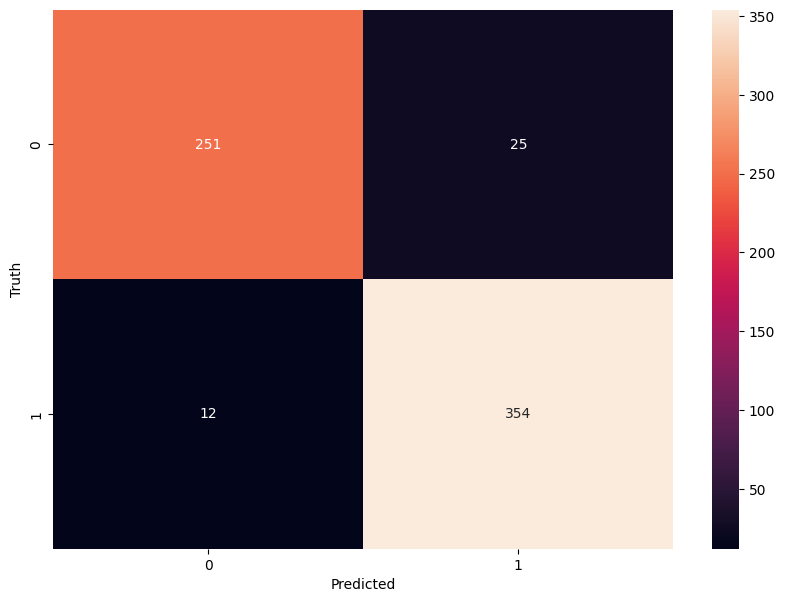

In [76]:
cm = tf.math.confusion_matrix(labels=yr_test, predictions=y_pred)
plt.figure(figsize =(10,7))
sns.heatmap(cm, annot= True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

### Exactitud (Accuracy)

In [77]:
round((250+356)/(250+361+14+15), 2)

0.95

### Precision para los clientes que no abandonaron.

In [78]:
round((251)/(251+15), 2)

0.94

### Precision para los clientes que abandonaron.

In [79]:
round((361)/(361+15), 2)

0.96

### Recall para la clase 0

In [80]:
round((251)/(251+15), 2)

0.94

### Recall para la clase 1

In [81]:
round((361)/(361+15), 2)

0.96

In [82]:
from sklearn.metrics import roc_auc_score, roc_curve

Text(0.5, 0, 'Verdadero Positivo')

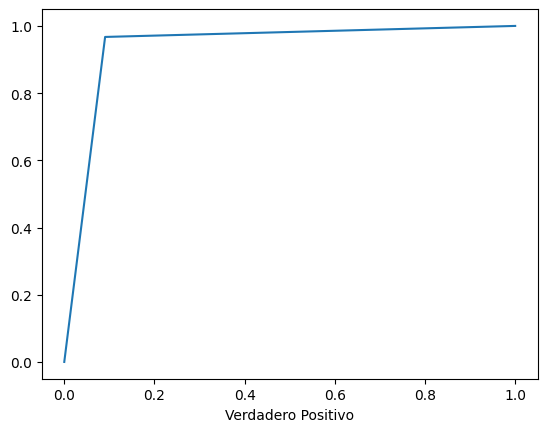

In [83]:
fpr, tpr, thresholds = roc_curve(yr_test, y_pred)
plt.plot(fpr, tpr)
plt.xlabel('Falso Positivo')
plt.xlabel('Verdadero Positivo')

In [84]:
import pickle

In [85]:
filename = 'model_rf_smote.sav'

In [86]:
pickle.dump(model_rf_smote, open(filename, 'wb'))

In [87]:
load_model = pickle.load(open(filename, 'rb'))

In [88]:
model_score_r1 = load_model.score(xr_test, yr_test)

In [89]:
model_score_r1

0.926791277258567

In [90]:
filename = 'model_ANN.sav'

In [91]:
pickle.dump(model, open(filename, 'wb'))

In [92]:
load_model = pickle.load(open(filename, 'rb'))

In [93]:
model_score_ann = load_model.evaluate(xr_test, yr_test)

21/21 [==============================] - 0s 2ms/step - loss: 0.1383 - accuracy: 0.9424
